## Airline Passenger Traffic Data Analysis 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('airline-passenger-traffic.csv', header=None)
data.columns = ['month', 'passengers']
data['month'] = pd.to_datetime(data['month'], format='%Y-%m')
data = data.set_index('month')
data.head()

,passengers
month,
1949-01-01,112.0
1949-02-01,118.0
1949-03-01,132.0
1949-04-01,129.0
1949-05-01,121.0


### Timeseries Analysis

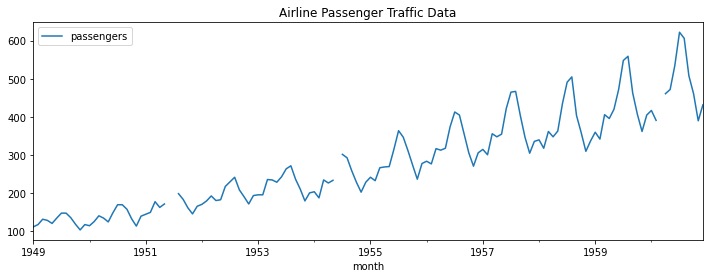

In [3]:
# Plot timeseries data
data.plot(figsize=(12,4))
plt.legend(loc='best')
plt.title('Airline Passenger Traffic Data')
plt.show(block=False)

### Missing Value Treatment

#### Mean Imputation

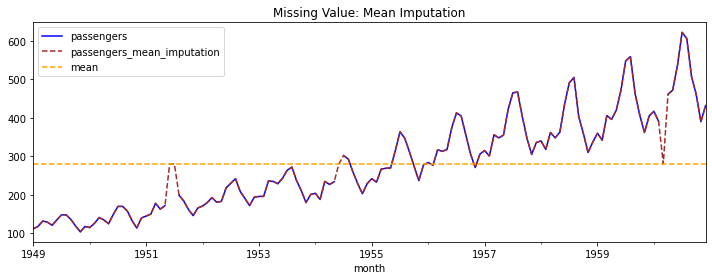

In [4]:
# Copy data
data_ = data.copy()

# Perform mean imputation
data_ = data_.assign(
    passengers_mean_imputation=data_.passengers.fillna(
        data_.passengers.mean()
    )
)

# plot the time series.
ax = data_['passengers'].plot(color='b', figsize=[10, 4])

# plot the imputed values on top, in red.
data_['passengers_mean_imputation'].plot(ax=ax, linestyle='--', color='brown')

# Plot a horizontal line at the mean value
plt.axhline(y=data_.passengers.mean(), color='orange', linestyle='--', label='mean')

plt.legend(loc='best')
plt.title('Missing Value: Mean Imputation')
plt.tight_layout()
plt.show(block=False)

Not a good imputation method

#### Linear Interpolation

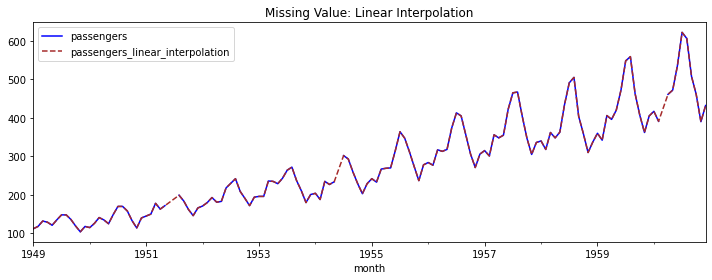

In [5]:
# Copy data
data_ = data.copy()

# Perform mean imputation
data_ = data_.assign(
    passengers_linear_interpolation=data_.passengers.interpolate(method='linear')
)

# plot the time series.
ax = data_['passengers'].plot(color='b', figsize=[10, 4])

# plot the imputed values on top, in red.
data_['passengers_linear_interpolation'].plot(ax=ax, linestyle='--', color='brown')

plt.legend(loc='best')
plt.title('Missing Value: Linear Interpolation')
plt.tight_layout()
plt.show(block=False)

Use linear interpolation to impute missing value

In [6]:
# Check for missing values
data.passengers.isna().sum()

4

In [7]:
# Missing value treatment
data['passengers'] = data_['passengers_linear_interpolation']
data.passengers.isna().sum()

0

### Outlier Treatment
* Mean, Median or Mode
* Trimming
* Lower & Upper Capping
* Zero Capping

#### Box Plot & Interquartile Range

In [8]:
import seaborn as sns

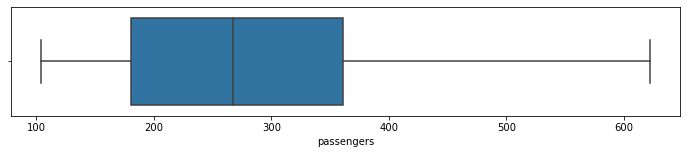

In [9]:
fig = plt.subplots(figsize=(12,2))
ax = sns.boxplot(x=data.passengers, whis=1.5)
plt.show()

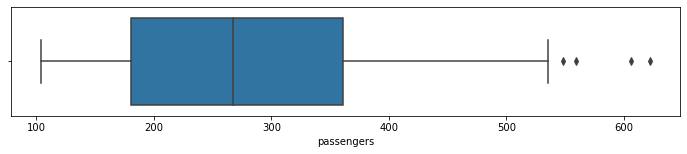

In [10]:
fig = plt.subplots(figsize=(12,2))
ax = sns.boxplot(x=data.passengers, whis=1)
plt.show()

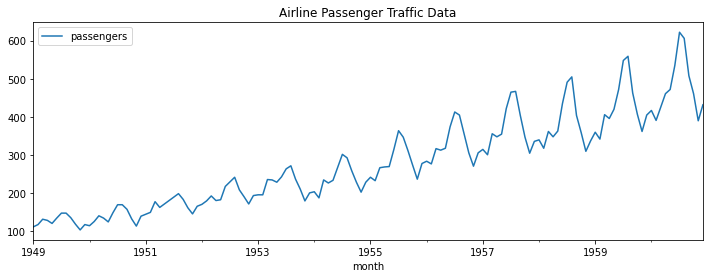

In [11]:
# Plot timeseries data
data.plot(figsize=(12,4))
plt.legend(loc='best')
plt.title('Airline Passenger Traffic Data')
plt.show(block=False)

As we can see values above 540 are not outliers as they show upward trend so we will set `whis` to `1.5`

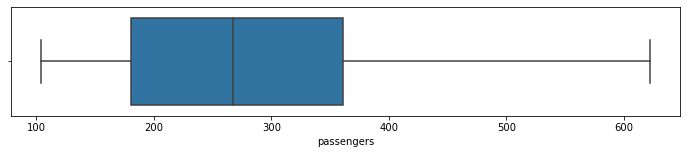

In [12]:
fig = plt.subplots(figsize=(12,2))
ax = sns.boxplot(x=data.passengers, whis=1.5)
plt.show()

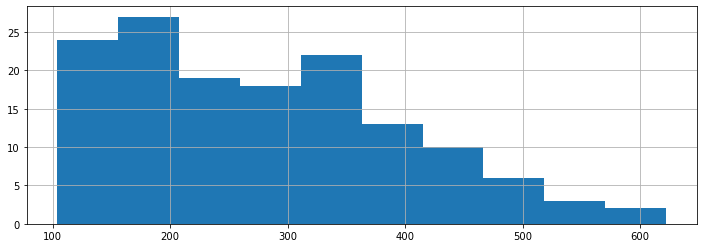

In [13]:
fig = data.passengers.hist(figsize=(12,4))
plt.show()

No outliers detected in this time series

### Timeseries Decomposition
* Additive
* Multiplicative

#### Additive

In [14]:
from pylab import rcParams
import statsmodels.api as sm
rcParams['figure.figsize'] = 12,8

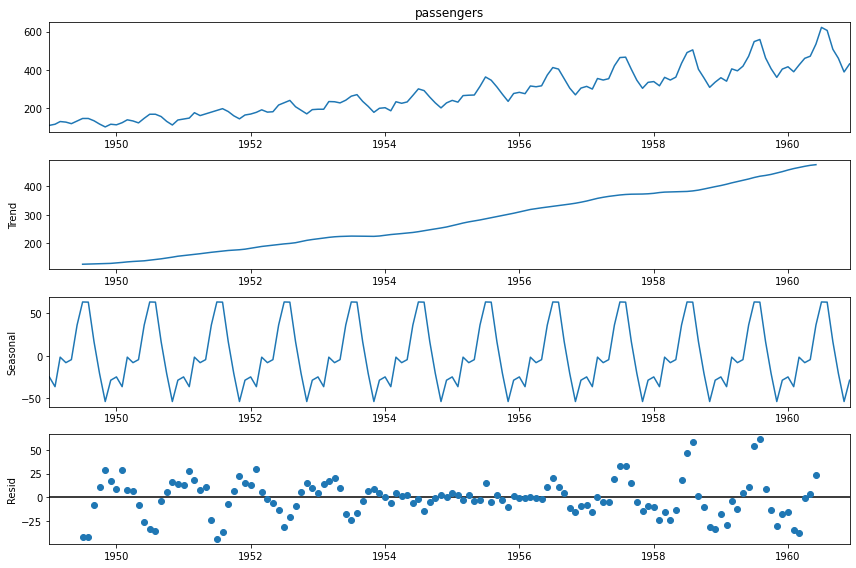

In [15]:
decomposition = sm.tsa.seasonal_decompose(data.passengers, model='additive')
fig = decomposition.plot()
plt.show()

#### Multiplicative

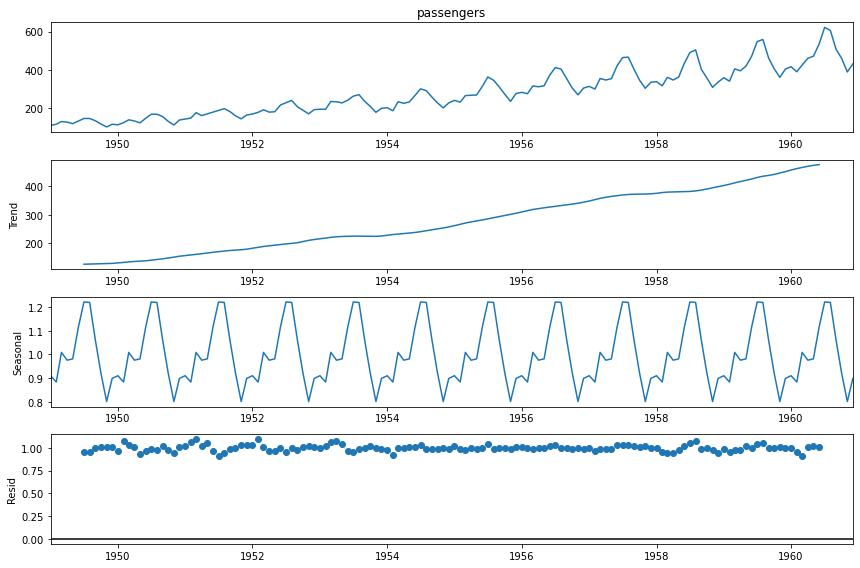

In [16]:
decomposition = sm.tsa.seasonal_decompose(
    data.passengers, 
    model='multiplicative'
)
fig = decomposition.plot()
plt.show()

#### Build & Evaluate Timeseries Forcast

In [17]:
# Splitting timeseries into train and test sets
train_len = 120 # first 120 records
train = data[0:train_len]
test = data[train_len:]

#### Naive Method

In [18]:
y_hat_naive = test.copy()
y_hat_naive['naive_forcast'] = train['passengers'][train_len - 1] # last value

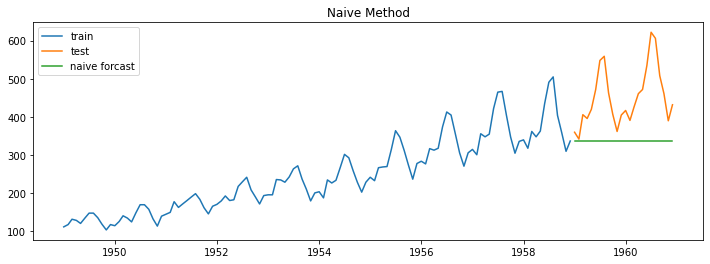

In [19]:
# Plot train, test & forcast
plt.figure(figsize=(12,4))
plt.plot(train['passengers'], label='train')
plt.plot(test['passengers'], label='test')
plt.plot(y_hat_naive['naive_forcast'], label='naive forcast')
plt.legend(loc='best')
plt.title('Naive Method')
plt.show()

#### Calculate RMSE & MAPE to Evaluate Forcast

In [20]:
# Initialize an empty results dataframe
results_df = pd.DataFrame(columns=['Method', 'RMSE', 'MAPE'])

In [21]:
def calculate_rmse(y_true, y_pred):
    return np.sqrt(np.mean((y_true - y_pred)**2)).round(2)

def calculate_mape(y_true, y_pred):
    return round(np.mean(np.abs((y_true - y_pred) / y_true)) * 100, 2)

def update_results_df(method, y_true, y_pred):
    rmse = calculate_rmse(y_true, y_pred)
    mape = calculate_mape(y_true, y_pred)
    
    global results_df
    features = {'Method': method, 'RMSE': rmse, 'MAPE': mape}
    results_df = results_df.append(features, ignore_index=True)

In [22]:
# Calculate RMSE & MAPE - Naive Method
update_results_df(
    'Naive Method',
    test.passengers, 
    y_hat_naive.naive_forcast
)
results_df

,Method,RMSE,MAPE
0,Naive Method,137.51,23.63


#### Simple Average Method 

In [23]:
y_hat_average = test.copy()
y_hat_average['average_forcast'] = train.passengers.mean()

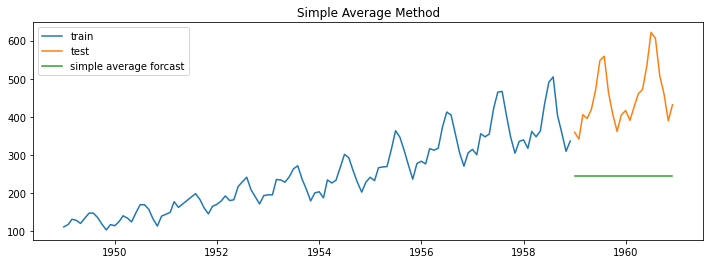

In [24]:
# Plot train, test & forcast
plt.figure(figsize=(12,4))
plt.plot(train['passengers'], label='train')
plt.plot(test['passengers'], label='test')
plt.plot(y_hat_average['average_forcast'], label='simple average forcast')
plt.legend(loc='best')
plt.title('Simple Average Method')
plt.show()

In [25]:
# Calculate RMSE & MAPE - Simple Average Method
update_results_df(
    'Simple Average Method',
    test.passengers, 
    y_hat_average.average_forcast
)
results_df

,Method,RMSE,MAPE
0,Naive Method,137.51,23.63
1,Simple Average Method,219.69,44.28
